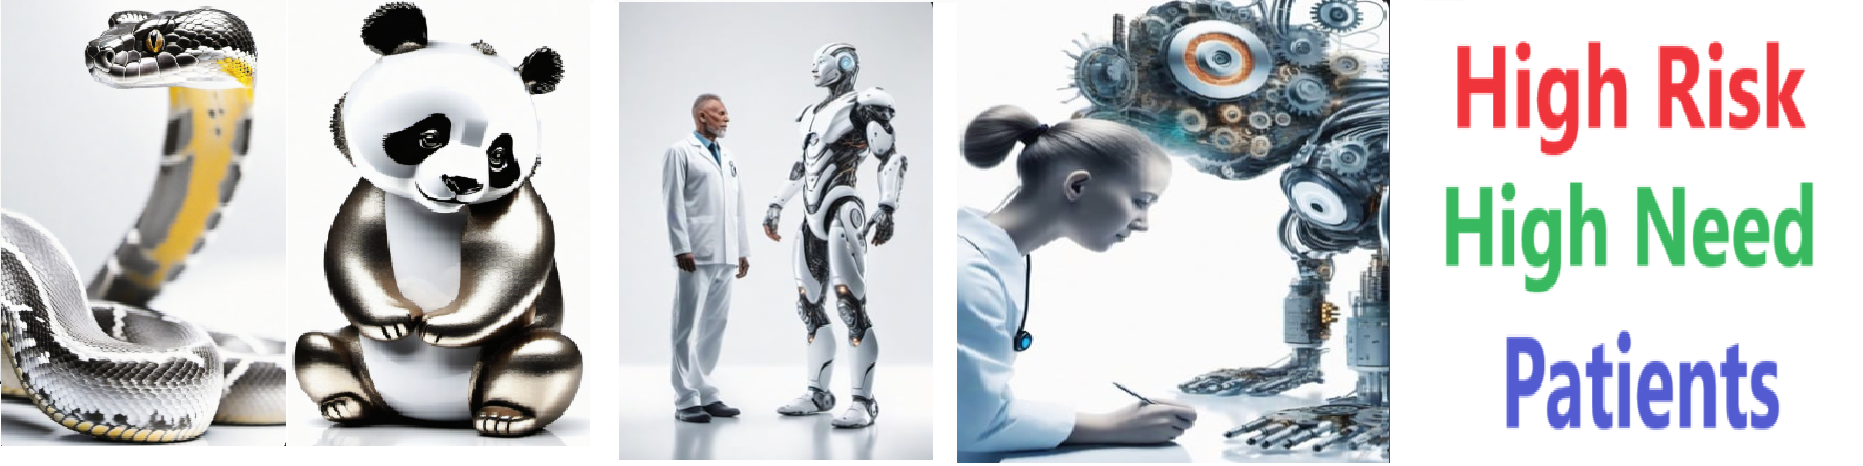

# Producing High Risk High Need Reports for Providers Automatically
### by Josh Vangor and Joe Eberle started on 09_29_2023

In [1]:
# Install any Libraries your dont already have 
first_install = False
if first_install:
    !pip install ydata-profiling
    !pip install pyttsx3
    !pip install openpyxl

In [2]:
# Import all of the libraries you need  !pip install pandas_profiling
import ydata_profiling # provides descriptive statistics in html for any dataframe
import display_descriptive as dd
import pandas as pd #Pandas is high performance data manipulation 
import os 
import rpa_excel as re

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [3]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'high_risk_high_need'

## Optional Step 0 - Starting Logger

In [4]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_Start(solution_name, start_time) 

## Optional Step 0 - Build a working directory to house your reports

In [5]:
# Optional Step 0 - Build a working directory to house your analysis
import os

directory_path = r'c:\reports\high_risk_high_need'

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")

Directory 'c:\reports\high_risk_high_need' already exists.


## Optional Step 0 - clean out any old reports

In [6]:
directory_path = r'c:\reports\high_risk_high_need'

def delete_files_in_directory(target_directory):
    try:
        # Verify if the target_directory exists
        if not os.path.exists(target_directory):
            print(f"The directory '{target_directory}' does not exist.")
            return 0  # No files deleted

        files_deleted = 0

        # Loop through files in the target_directory and delete them
        for file in os.listdir(target_directory):
            file_path = os.path.join(target_directory, file)
            if os.path.isfile(file_path):
                os.remove(file_path)  # Delete the file
                files_deleted += 1

        print(f"{files_deleted} files deleted in '{target_directory}'.")
        return files_deleted
    
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return 0  # No files deleted due to error

# Example usage:
# Specify the target directory to delete its files
directory_path = r'c:\reports\high_risk_high_need'
deleted_count = delete_files_in_directory(directory_path)
print(f"Total files deleted: {deleted_count}")


4 files deleted in 'c:\reports\high_risk_high_need'.
Total files deleted: 4


## Optional Step 0 - Build a working directory to archive your reports

In [7]:
# Optional Step 0 - Build a working directory to archive your reports 
directory_path = r'c:\reports\high_risk_high_need\archive'

# Create the directory if it doesn't exist
if not os.path.exists(directory_path):
    os.makedirs(directory_path)
    print(f"Directory '{directory_path}' created successfully.")
else:
    print(f"Directory '{directory_path}' already exists.")

Directory 'c:\reports\high_risk_high_need\archive' already exists.


## Step 1 - Load ANY data set for which to run discovery or data profiling

In [8]:
logging.info(f'{solution_name} - Step 1 - Load ANY data set for which to run discovery or data profiling')  
getting_data = True
if getting_data: 
    file_name = "C:\\working_directory\\excel\\high_risk_sample_II.xlsx"    
    df_high_risk_high_need = pd.read_excel(file_name)   
    df = df_high_risk_high_need
    print(f'The data contains {df_high_risk_high_need.shape[0]} rows and {df_high_risk_high_need.shape[1]} columns')


The data contains 341 rows and 7 columns


In [9]:
 df_high_risk_high_need.head(2)

,Patient Name,Date of Birth,Date of Admission,High Risk,Patient Alert (High Risk Info),Program Provider,Last Seen By
0,Patient Name 1,2003-12-21 00:00:00,2023-06-05,Y,$25 COPAY DUE AT EACH VISIT_x000D_\nHRHN #1,Doctor 1,Doctor 1
1,Patient Name 2,2004-07-07 00:00:00,2022-07-14,Y,HRHN - 3: Dual Diagnosis/Substance Use Disorde...,Doctor 2,Doctor 2


In [10]:
df_high_risk_high_need['Date of Birth'] = pd.to_datetime(df_high_risk_high_need['Date of Birth'], errors='coerce')
df_high_risk_high_need['Date of Birth'] = df_high_risk_high_need['Date of Birth'].apply(
    lambda x: x.strftime('%m/%d/%y') if pd.notnull(x) else ''
)

df_high_risk_high_need['Date of Admission'] = pd.to_datetime(df_high_risk_high_need['Date of Admission'], errors='coerce')
df_high_risk_high_need['Date of Admission'] = df_high_risk_high_need['Date of Admission'].apply(
    lambda x: x.strftime('%m/%d/%y') if pd.notnull(x) else ''
)

df_high_risk_high_need.head(2) 

,Patient Name,Date of Birth,Date of Admission,High Risk,Patient Alert (High Risk Info),Program Provider,Last Seen By
0,Patient Name 1,12/21/03,06/05/23,Y,$25 COPAY DUE AT EACH VISIT_x000D_\nHRHN #1,Doctor 1,Doctor 1
1,Patient Name 2,07/07/04,07/14/22,Y,HRHN - 3: Dual Diagnosis/Substance Use Disorde...,Doctor 2,Doctor 2


## Step 3 - Clear out old reports

In [11]:
def delete_files_in_directory(target_directory):
    try:
        # Verify if the target_directory exists
        if not os.path.exists(target_directory):
            print(f"The directory '{target_directory}' does not exist.")
            return 0  # No files deleted

        files_deleted = 0

        # Loop through files in the target_directory and delete them
        for file in os.listdir(target_directory):
            file_path = os.path.join(target_directory, file)
            if os.path.isfile(file_path):
                os.remove(file_path)  # Delete the file
                files_deleted += 1

        print(f"{files_deleted} files deleted in '{target_directory}'.")
        return files_deleted
    
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return 0  # No files deleted due to error

# Example usage:
# Specify the target directory to delete its files
target_directory = "/path/to/your/directory"
deleted_count = delete_files_in_directory(target_directory)
print(f"Total files deleted: {deleted_count}")


The directory '/path/to/your/directory' does not exist.
Total files deleted: 0


## Example - df.columns provides a list of each column

In [12]:
df.columns

Index(['Patient Name', 'Date of Birth', 'Date of Admission', 'High Risk',
       'Patient Alert (High Risk Info)', 'Program Provider', 'Last Seen By'],
      dtype='object')

## Example - df.describe() Provides High level stats on each column

In [13]:
df.describe() 

,Patient Name,Date of Birth,Date of Admission,High Risk,Patient Alert (High Risk Info),Program Provider,Last Seen By
count,341,341,341,341,341,341,341
unique,131,156,6,1,117,4,4
top,Patient Name 6,07/08/76,07/14/22,Y,HRHN - 3: Dual Diagnosis/Substance Use Disorde...,Doctor 2,Doctor 2
freq,14,5,86,341,57,170,157


## Example - df.shape tells you the rows and columns

In [14]:
df.shape

(341, 7)

In [15]:
df.head(2)

,Patient Name,Date of Birth,Date of Admission,High Risk,Patient Alert (High Risk Info),Program Provider,Last Seen By
0,Patient Name 1,12/21/03,06/05/23,Y,$25 COPAY DUE AT EACH VISIT_x000D_\nHRHN #1,Doctor 1,Doctor 1
1,Patient Name 2,07/07/04,07/14/22,Y,HRHN - 3: Dual Diagnosis/Substance Use Disorde...,Doctor 2,Doctor 2


In [16]:
df.dtypes

Patient Name                      object
Date of Birth                     object
Date of Admission                 object
High Risk                         object
Patient Alert (High Risk Info)    object
Program Provider                  object
Last Seen By                      object
dtype: object

In [17]:
df.tail(2)

,Patient Name,Date of Birth,Date of Admission,High Risk,Patient Alert (High Risk Info),Program Provider,Last Seen By
339,Patient Name 134,03/18/08,07/28/16,Y,NEEDS ROCHESTER RHIO FORM,Doctor 2,Doctor 2
340,Patient Name 135,,03/15/23,Y,$25 COPAY DUE AT EACH VISIT_x000D_\nHRHN #57,Doctor 1,Doctor 3


## Step 2 - Render descriptive statistics and profile every feature or Column of the Dataset

In [18]:
#data_set_name = 'high_risk_high_need'
#dd.display_descriptive_statistics(dd.get_descriptive_statistics(df,data_set_name))

## Strip Any spaces from Left of Provider Names

In [19]:
df["Program Provider"] = df["Program Provider"].str.strip(" ")

In [20]:
provider_list = df["Program Provider"].unique()
print(provider_list)

['Doctor 1' 'Doctor 2' 'Doctor 3' 'Doctor 9']


## Step 3 - Chunk the data set into personalized reports per Doctor

In [21]:
import datetime
report_date = datetime.datetime.now().strftime("_%m_%d_%Y")
for index, provider in enumerate(provider_list):
    df_provider = df[(df["Program Provider"] == provider)]
    provider = provider.replace(" ","_")
    print(f'Found {index}  Provider {provider} high risk patients:{df_provider.shape[0]}')
    provider_save_filename = f"c://reports//high_risk_high_need//provider_{provider}_high_risk" + report_date + ".xlsx" 
    print(f'writing {provider} to: {provider_save_filename}   ')
    with pd.ExcelWriter(provider_save_filename) as writer:
        df_provider.to_excel(writer, sheet_name='High Risk',index = False) 

Found 0  Provider Doctor_1 high risk patients:35
writing Doctor_1 to: c://reports//high_risk_high_need//provider_Doctor_1_high_risk_11_10_2023.xlsx   
Found 1  Provider Doctor_2 high risk patients:170
writing Doctor_2 to: c://reports//high_risk_high_need//provider_Doctor_2_high_risk_11_10_2023.xlsx   
Found 2  Provider Doctor_3 high risk patients:102
writing Doctor_3 to: c://reports//high_risk_high_need//provider_Doctor_3_high_risk_11_10_2023.xlsx   
Found 3  Provider Doctor_9 high risk patients:34
writing Doctor_9 to: c://reports//high_risk_high_need//provider_Doctor_9_high_risk_11_10_2023.xlsx   


## Step 4 - Format all of the reports so they look professional and are easy to use and efficient 

In [22]:
# testing = True
# if testing:
#     formatted_excel_Files = re.format_excel_directory('c://reports//high_risk_high_need')
#     print(f'Formatted #{formatted_excel_Files} excel files') 

In [23]:
import os
import shutil
import re

def move_files_by_regex_and_extension(source_dir, target_dir, regex_pattern, file_extension):
    # Ensure the source and target directories exist
    if not os.path.exists(source_dir):
        print(f"Source directory '{source_dir}' does not exist.")
        return
    if not os.path.exists(target_dir):
        print(f"Target directory '{target_dir}' does not exist.")
        return

    # Compile the regular expression pattern
    try:
        regex = re.compile(regex_pattern)
    except re.error as e:
        print(f"Invalid regular expression: {e}")
        return

    # Iterate over files in the source directory
    for filename in os.listdir(source_dir):
        source_file_path = os.path.join(source_dir, filename)

        # Check if the file matches the regular expression and extension
        if regex.search(filename) and filename.endswith(file_extension):
            # Construct the target file path
            target_file_path = os.path.join(target_dir, filename)

            # Move the file to the target directory
            try:
                shutil.move(source_file_path, target_file_path)
                print(f"Moved '{filename}' to '{target_dir}'.")
            except Exception as e:
                print(f"Failed to move '{filename}': {e}")

# Example usage:
source_directory = "/path/to/source_directory"
target_directory = "/path/to/target_directory"
regular_expression = r"_ft"     # Replace with your regular expression
file_extension = ".xlsx"       # Replace with your desired file extension
move_files_by_regex_and_extension(source_directory, target_directory, regular_expression, file_extension)


Source directory '/path/to/source_directory' does not exist.


## Step 0 - Process End - display log

In [24]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2023-11-10 13:09:12,932 - INFO - START high_risk_high_need =============================================
2023-11-10 13:09:12,932 - INFO - START high_risk_high_need Start Time = 2023-11-10 13:09:12
2023-11-10 13:09:12,932 - INFO - high_risk_high_need Step 0 - Initialize the configuration file parser
2023-11-10 13:09:12,991 - INFO - high_risk_high_need - Step 1 - Load ANY data set for which to run discovery or data profiling
2023-11-10 13:09:13,924 - INFO - PERFORMANCE high_risk_high_need The total process duration was:0.99
2023-11-10 13:09:13,926 - INFO - PERFORMANCE high_risk_high_need Stop Time = 2023-11-10 13:09:13
2023-11-10 13:09:13,926 - INFO - PERFORMANCE high_risk_high_need Short process duration less than 3 Seconds:0.99
2023-11-10 13:09:13,926 - INFO - PERFORMANCE high_risk_high_need Performance optimization is not reccomended
2023-11-10 13:09:13,926 - INFO - END high_risk_high_need =============================================

